In [1]:
import pandas as pd

In [2]:
l = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]

In [3]:
s = pd.Series(l)

In [4]:
s.nunique()

12

In [5]:
bins = pd.qcut(s, 4) # Equal frequency binning

# How do we make data smooth using mean?

In [6]:
df = pd.DataFrame(
    {
        'data': l,
        'bins': bins
    }
)

In [7]:
df

,data,bins
0,5,"(4.999, 12.5]"
1,10,"(4.999, 12.5]"
2,11,"(4.999, 12.5]"
3,13,"(12.5, 42.5]"
4,15,"(12.5, 42.5]"
5,35,"(12.5, 42.5]"
6,50,"(42.5, 77.0]"
7,55,"(42.5, 77.0]"
8,72,"(42.5, 77.0]"
9,92,"(77.0, 215.0]"


In [8]:
t = df.groupby(['bins']).mean(['data'])

In [9]:
t

,data
bins,
"(4.999, 12.5]",8.666667
"(12.5, 42.5]",21.000000
"(42.5, 77.0]",59.000000
"(77.0, 215.0]",170.333333


In [16]:
map_of_mean_values = {}
for i in t.iterrows():
    
    # type(i[0]): Interval
    # type(i[1]): Series
    
    map_of_mean_values.update({str(i[0]): i[1][0]})

In [17]:
map_of_mean_values

{'(4.999, 12.5]': 8.666666666666666,
 '(12.5, 42.5]': 21.0,
 '(42.5, 77.0]': 59.0,
 '(77.0, 215.0]': 170.33333333333334}

In [22]:
df['bins'] = df['bins'].astype(str)

In [23]:
df[df['bins'] == '(4.999, 12.5]']

,data,bins
0,5,"(4.999, 12.5]"
1,10,"(4.999, 12.5]"
2,11,"(4.999, 12.5]"


In [26]:
df['smoothed_values'] = df['bins'].apply(lambda x: map_of_mean_values[x])

In [27]:
df

,data,bins,smoothed_values
0,5,"(4.999, 12.5]",8.666667
1,10,"(4.999, 12.5]",8.666667
2,11,"(4.999, 12.5]",8.666667
3,13,"(12.5, 42.5]",21.000000
4,15,"(12.5, 42.5]",21.000000
5,35,"(12.5, 42.5]",21.000000
6,50,"(42.5, 77.0]",59.000000
7,55,"(42.5, 77.0]",59.000000
8,72,"(42.5, 77.0]",59.000000
9,92,"(77.0, 215.0]",170.333333


In [28]:
import matplotlib.pyplot as plt

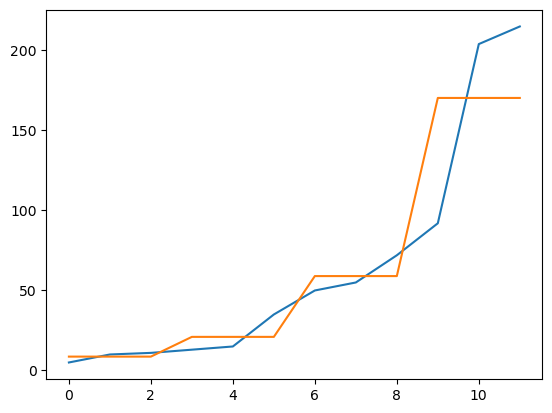

In [30]:
plt.plot(df['data'])
plt.plot(df['smoothed_values'])